In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///F:/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df=df.fillna(0)

In [7]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48895,48895,48895,48895,48895,48895
unique,47906,11453,5,221,3,1765
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,0
freq,18,417,21661,3920,25409,10052


In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(48895, 16)

In [12]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [14]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

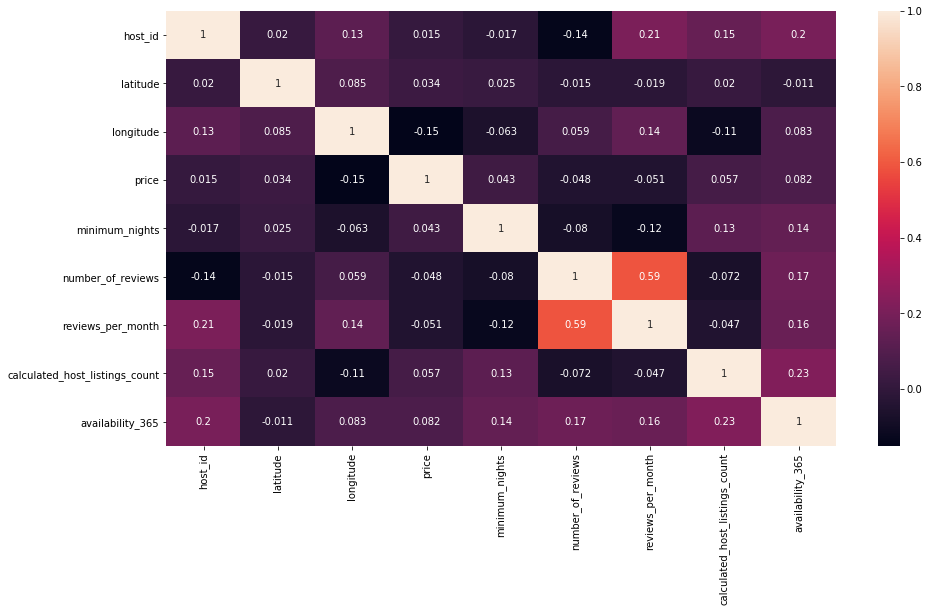

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [17]:
df.shape

(48895, 12)

In [18]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

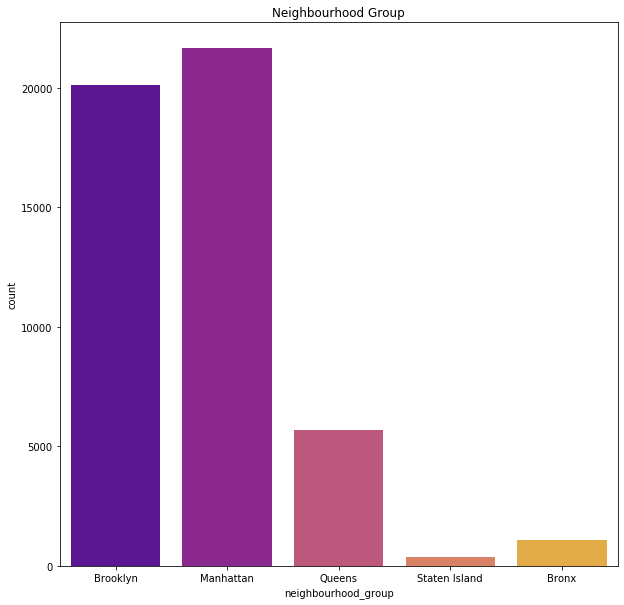

In [19]:
plt.figure(figsize=(10,10))
plt.title('Neighbourhood Group')
sns.countplot(df['neighbourhood_group'],palette='plasma')


Text(0.5, 1.0, 'Neighbourhood')

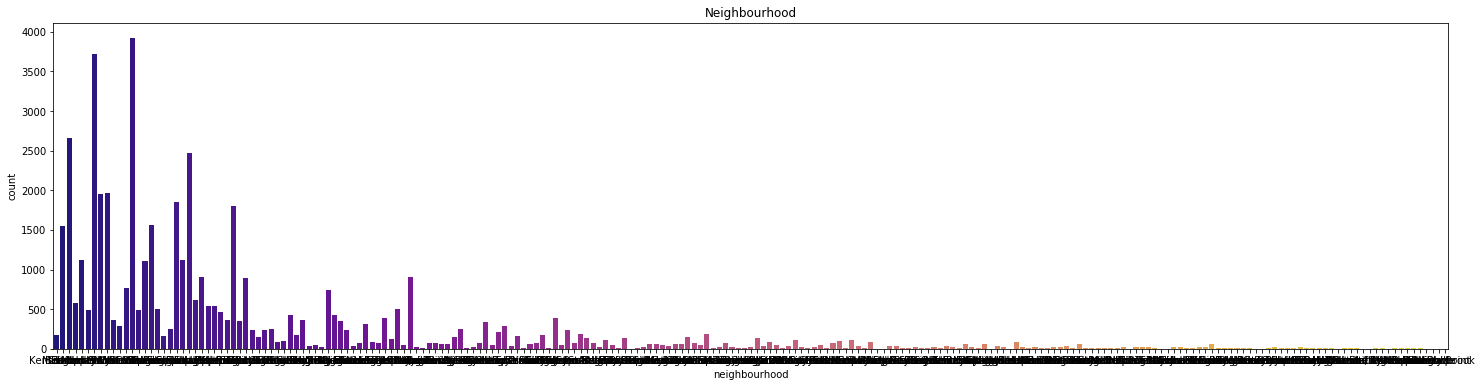

In [20]:
sns.countplot(df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

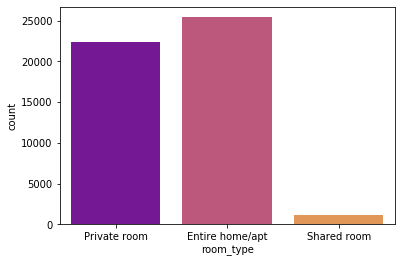

In [21]:
sns.countplot(df['room_type'],palette='plasma')

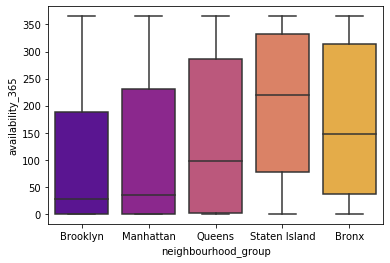

In [22]:
sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette='plasma')

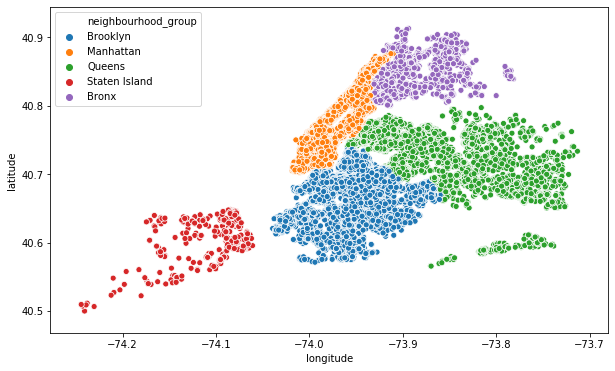

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='neighbourhood_group')

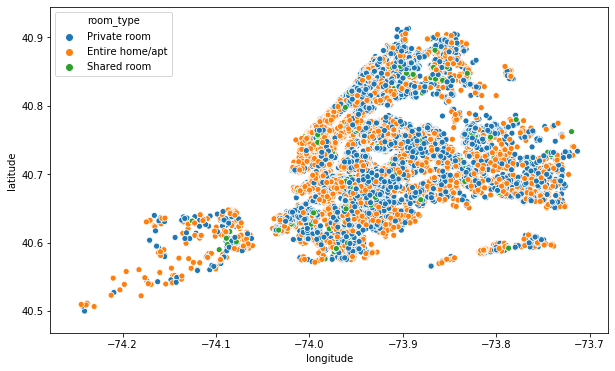

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='room_type')

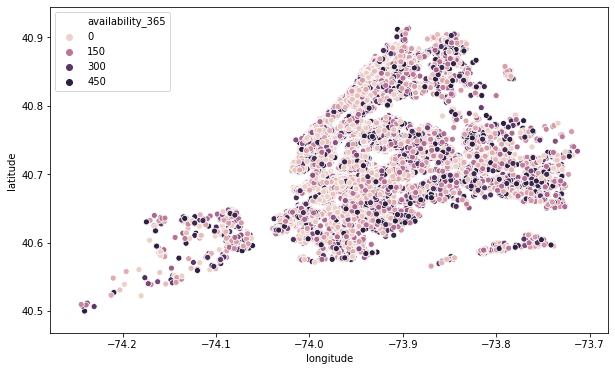

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='availability_365')

In [26]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [27]:
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group', 'room_type','neighbourhood'])]:
        df[column] = df[column].factorize()[0]
    return df

df = Encode(df.copy())

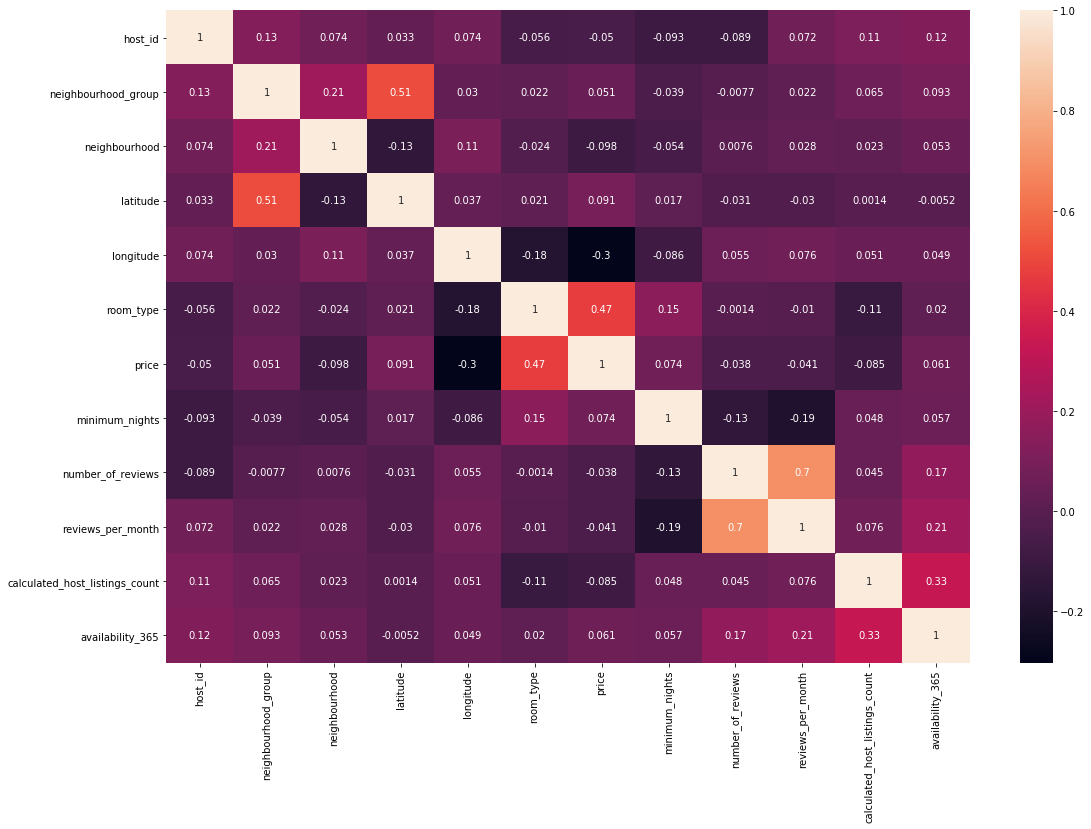

In [28]:
corr=df.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True)

In [29]:
x=df.drop(['price'],axis=1)
x

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,0,0,40.64749,-73.97237,0,1,9,0.21,6,365
1,2845,1,1,40.75362,-73.98377,1,1,45,0.38,2,355
2,4632,1,2,40.80902,-73.94190,0,3,0,0.00,1,365
3,4869,0,3,40.68514,-73.95976,1,1,270,4.64,1,194
4,7192,1,4,40.79851,-73.94399,1,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,40.67853,-73.94995,0,2,0,0.00,2,9
48891,6570630,0,21,40.70184,-73.93317,0,4,0,0.00,2,36
48892,23492952,1,2,40.81475,-73.94867,1,10,0,0.00,1,27
48893,30985759,1,7,40.75751,-73.99112,2,1,0,0.00,6,2


In [30]:
y=df.price.values
y

array([149, 225, 150, ..., 115,  55,  90], dtype=int64)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [32]:
xtrain.shape

(34226, 11)

In [33]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,2845,1,1,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,4632,1,2,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,4869,0,3,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,7192,1,4,40.79851,-73.94399,1,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,40.67853,-73.94995,0,70,2,0,0.00,2,9
48891,6570630,0,21,40.70184,-73.93317,0,40,4,0,0.00,2,36
48892,23492952,1,2,40.81475,-73.94867,1,115,10,0,0.00,1,27
48893,30985759,1,7,40.75751,-73.99112,2,55,1,0,0.00,6,2


In [34]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
li.score(xtest,ytest)

0.07387681433766669

In [36]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
tre.score(xtest,ytest)

0.06408071443179494

In [38]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,0,0,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,2845,1,1,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,4632,1,2,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,4869,0,3,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,7192,1,4,40.79851,-73.94399,1,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,40.67853,-73.94995,0,70,2,0,0.00,2,9
48891,6570630,0,21,40.70184,-73.93317,0,40,4,0,0.00,2,36
48892,23492952,1,2,40.81475,-73.94867,1,115,10,0,0.00,1,27
48893,30985759,1,7,40.75751,-73.99112,2,55,1,0,0.00,6,2


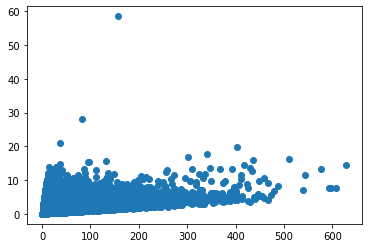

In [39]:
plt.scatter(df[['number_of_reviews']],df['reviews_per_month'])

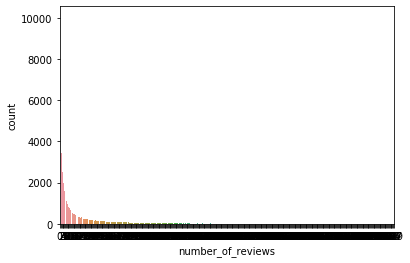

In [41]:
sns.countplot(df['number_of_reviews'])

In [42]:
import sweetviz as sv

In [43]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
from IPython.display import IFrame

In [45]:
IFrame(src='Analyze.html',width=1000,height=600)